In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [65]:
def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img, text="ABCDE",org=(50,300),fontFace=font,fontScale=5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

In [66]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap="gray")

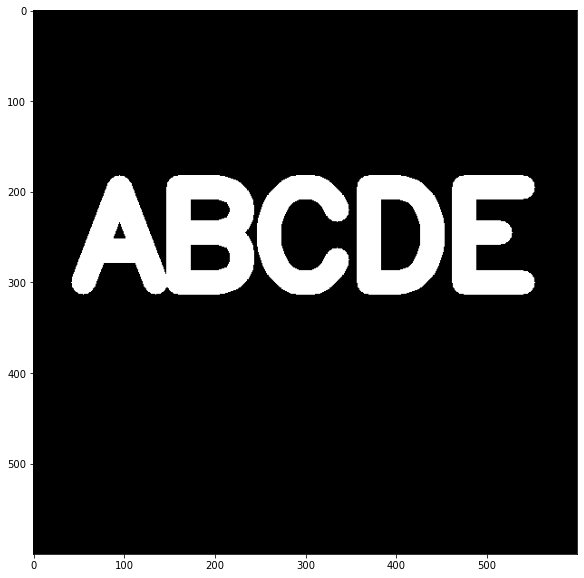

In [67]:
img = load_img()
display_img(img)

In [68]:
kernal = np.ones((5,5),dtype=np.uint8)
kernal

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

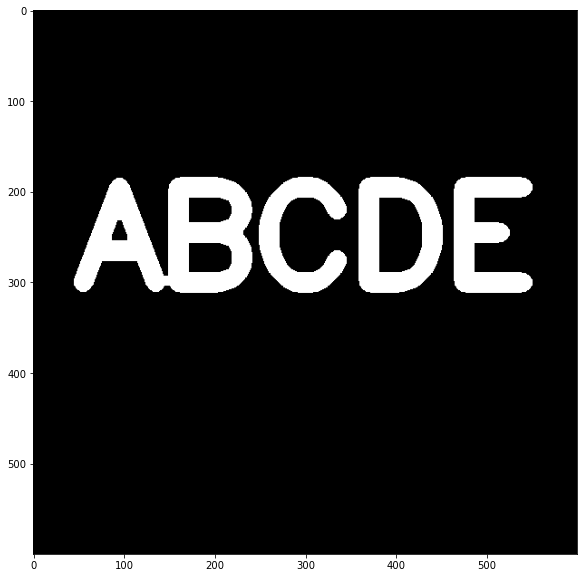

In [69]:
result = cv2.erode(img,kernal,iterations=1)
display_img(result)

In [71]:
img = load_img()
white_noise = np.random.randint(low=0,high=2,size=(600,600))
white_noise

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 1, 0],
       ...,
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 0, 1]])

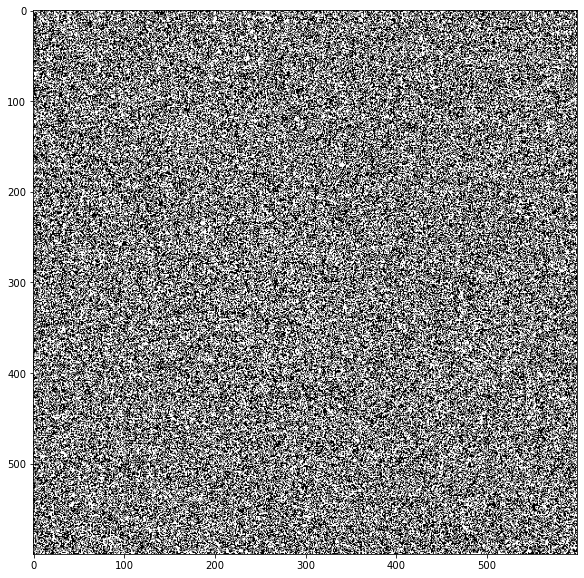

In [72]:
display_img(white_noise)

In [73]:
white_noise = white_noise * 255
white_noise

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ..., 255, 255,   0],
       [  0, 255,   0, ..., 255, 255,   0],
       ...,
       [  0, 255, 255, ...,   0,   0,   0],
       [  0,   0, 255, ...,   0, 255, 255],
       [  0,   0, 255, ...,   0,   0, 255]])

In [74]:
white_noise.shape

(600, 600)

In [75]:
img.shape

(600, 600)

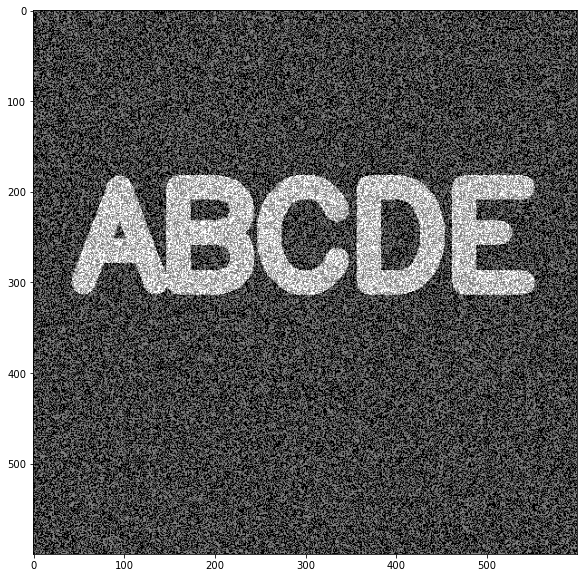

In [76]:
noise_img = white_noise+img
display_img(noise_img)

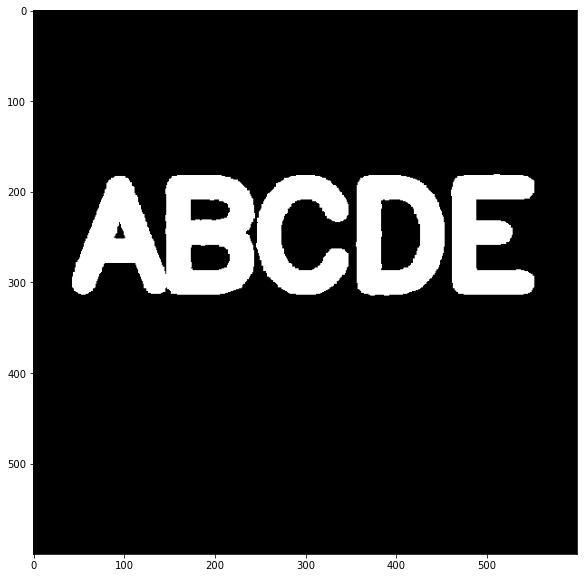

In [78]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN,kernal)
display_img(opening)

In [90]:
img = load_img()
black_noise = np.random.randint(low=0,high=2,size=(600,600))
black_noise

array([[1, 0, 0, ..., 1, 0, 1],
       [1, 0, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [0, 1, 0, ..., 1, 1, 0]])

In [91]:
black_noise = black_noise * -255
black_noise

array([[-255,    0,    0, ..., -255,    0, -255],
       [-255,    0, -255, ..., -255, -255, -255],
       [   0, -255, -255, ...,    0,    0,    0],
       ...,
       [-255,    0,    0, ...,    0, -255,    0],
       [   0,    0, -255, ..., -255,    0,    0],
       [   0, -255,    0, ..., -255, -255,    0]])

In [92]:
black_noise_img = img + black_noise
black_noise_img[black_noise_img==-255] = 0
# display_img(black_noise_img)
black_noise_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

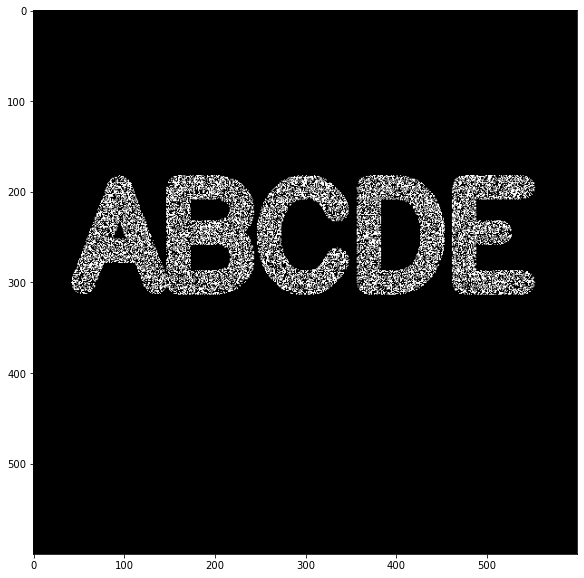

In [93]:
display_img(black_noise_img)

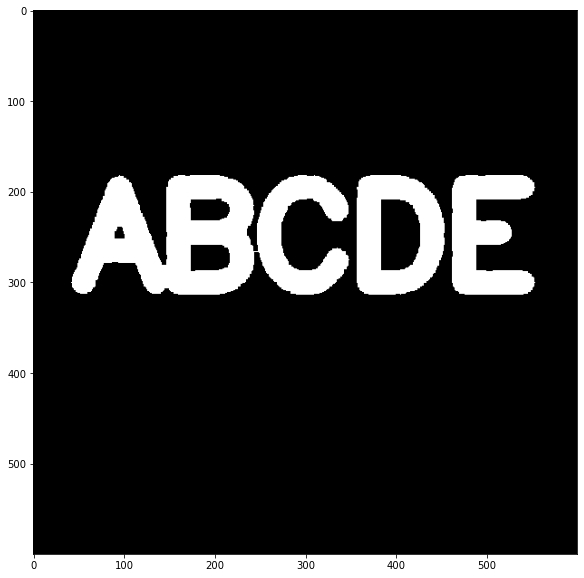

In [95]:
closing = cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE, kernal)
display_img(closing)

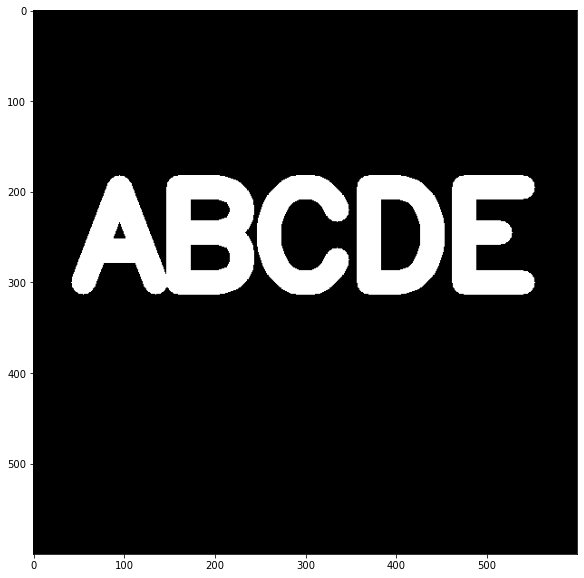

In [97]:
img = load_img()
display_img(img)

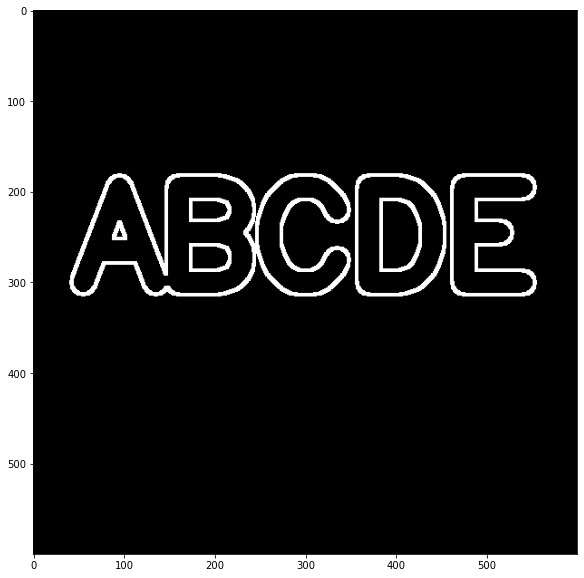

In [98]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT,kernal)
display_img(gradient) #diletion